## Parcial Final

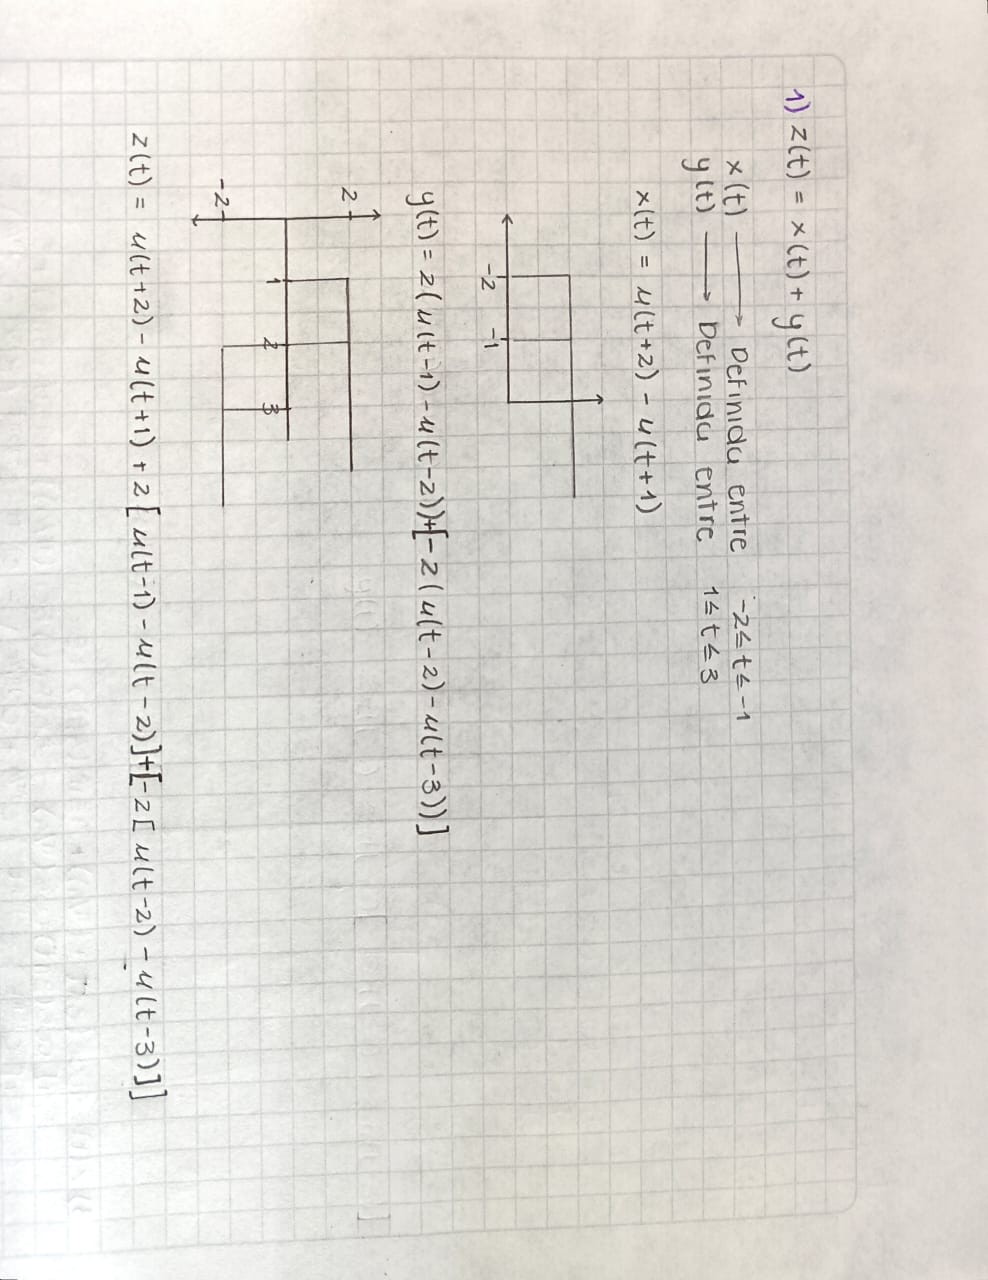

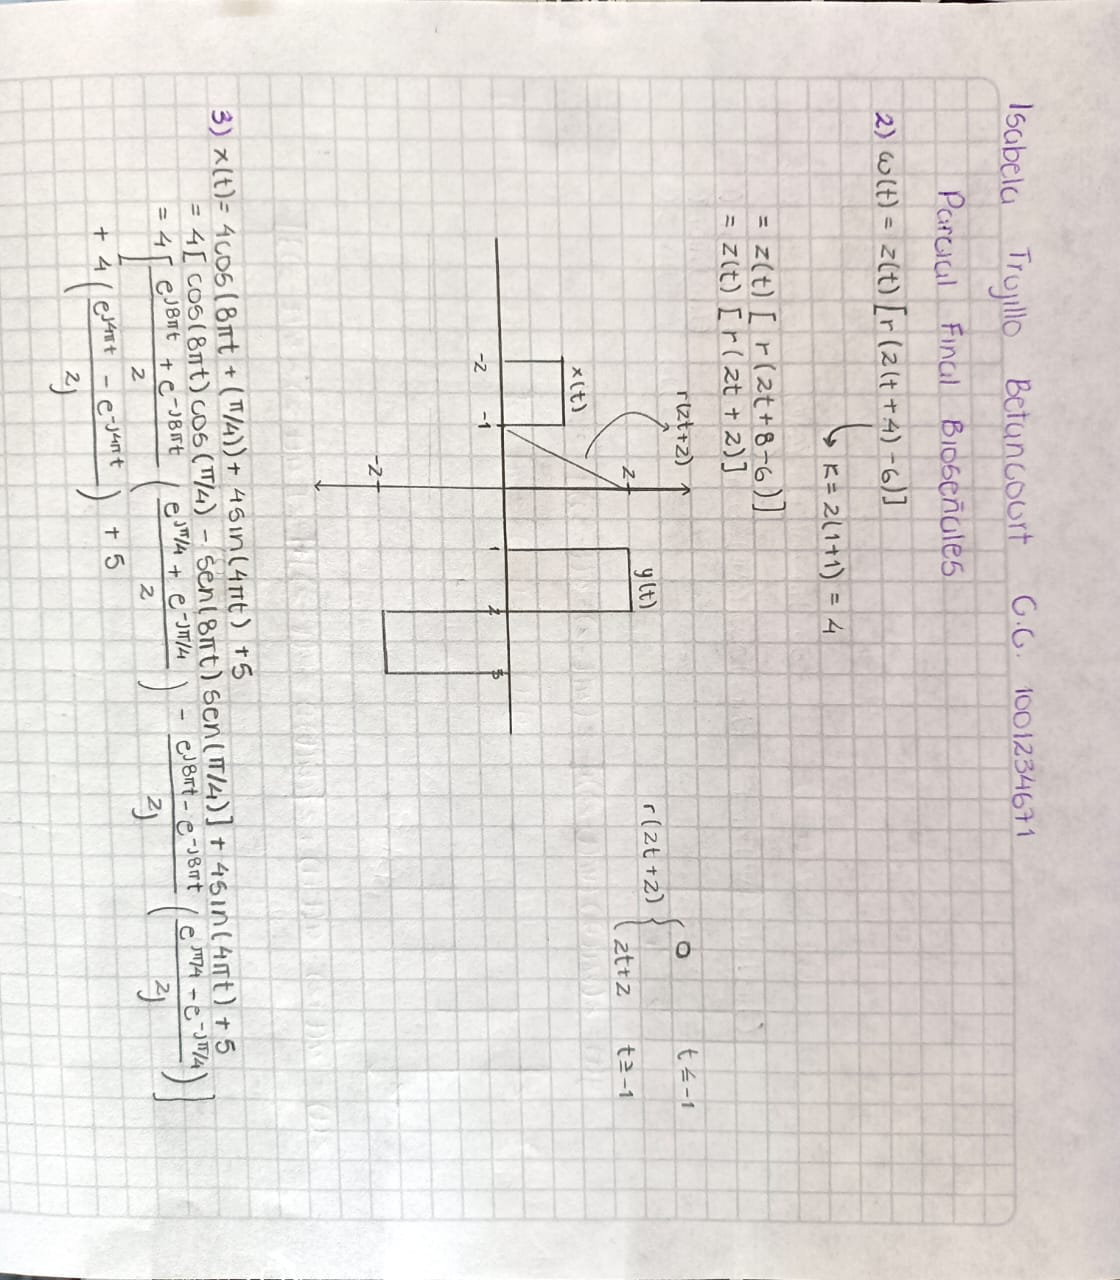

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab
x(t)= 4 ∗cos(80πt + (π /4))+ k ∗ sin(40πt)+ 5 Con k = 2(a+1) con a = último número de la cédula

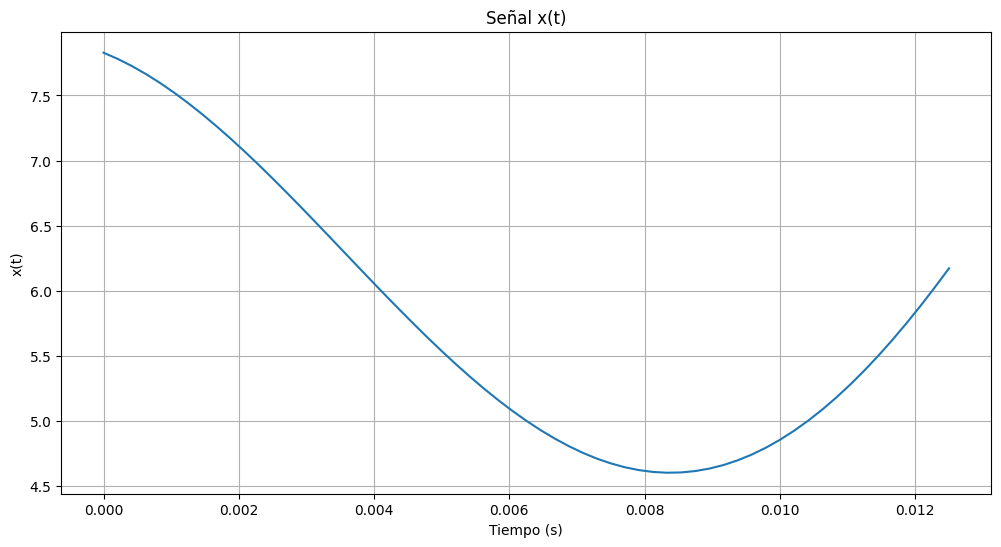

In [35]:
# La frecuencia de muestreo debe de ser el doble de la frecuencia máxima de la señal (Teorema de Nyquist)
Fo = 80 #Fmax de las señales
Fs = 160*30 #Se uso nyquist, se multiplico por 30 para mejorar la resolución

To = 1/Fo
Ts = 1/Fs
# Vector de tiempo para un periodo
t = np.arange(0,To+Ts,Ts)

x = 4 * np.cos(80*np.pi*t + (np.pi/4)) + 4*np.sin(40*np.pi*t) + 5

# Graficar la señal
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.title('Señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t)')
plt.grid()
plt.show()


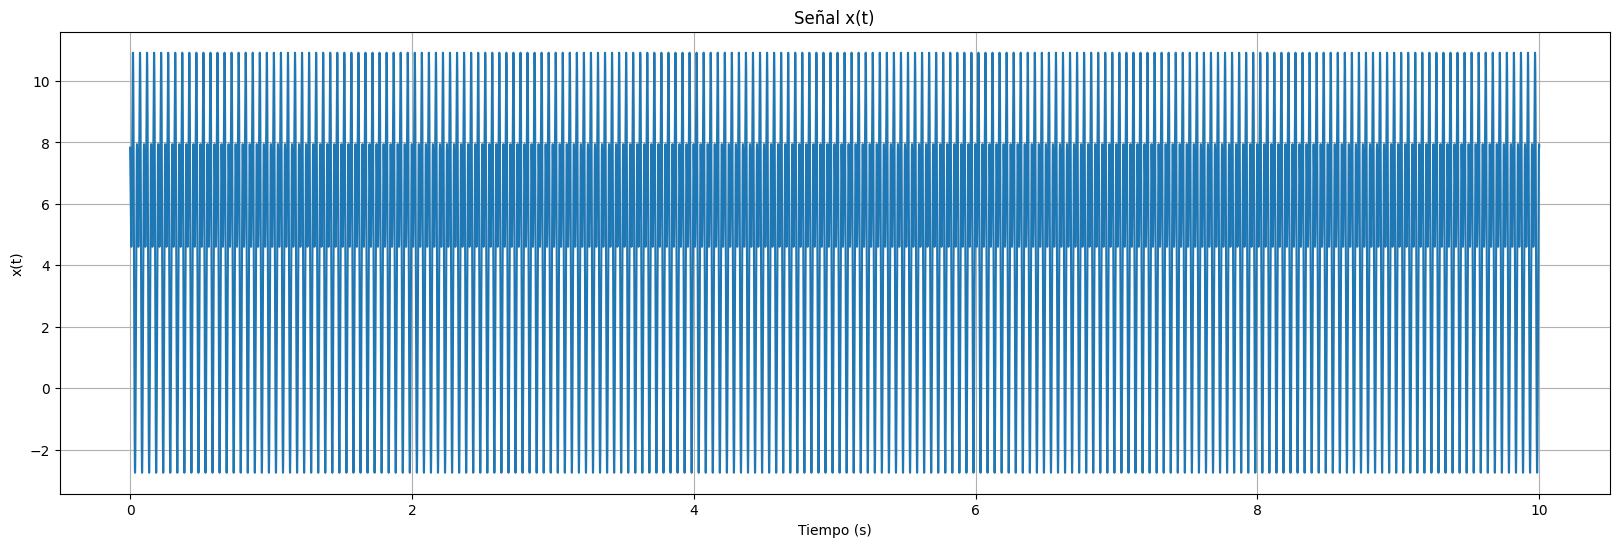

In [37]:
t_10segundos = np.arange(0,10,Ts)
x_10segundos = 4 * np.cos(80*np.pi*t_10segundos + (np.pi/4)) + 4*np.sin(40*np.pi*t_10segundos) + 5


# Graficar la señal
plt.figure(figsize=(20, 6))
plt.plot(t_10segundos, x_10segundos)
plt.title('Señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('x(t)')
plt.grid()
plt.show()

#### 5. Peridograma de Welch

In [44]:
def periodograma_welch(senal, M, S, window,Fs):

    # Número de segmentos
    segmentos = (len(senal) - S) // (M - S)

    # Para almacenar el periodograma
    Periodograma = np.zeros(M // 2 + 1)

    # Calcular el periodograma para cada segmento
    for i in range(segmentos):
        start = i * (M - S)
        end = start + M
        segment = senal[start:end] * window  # Aplicar la ventana
        fft_segment = np.fft.fft(segment)  # Calcular la FFT
        P_segment = (1 / (Fs * M)) * np.abs(fft_segment[:M // 2 + 1])**2  # Periodograma
        Periodograma += P_segment  # Sumar al periodograma total

    # Promediar el periodograma
    Periodograma /= segmentos

    # Frecuencias correspondientes
    frecuencias = np.fft.fftfreq(M, 1/Fs)[:M // 2 + 1]

    # Graficar el periodograma
    plt.figure(figsize=(12, 6))
    plt.semilogy(frecuencias, Periodograma)
    plt.title('Periodograma de Welch')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Densidad espectral de potencia')
    plt.grid()
    plt.xlim(0, Fs/2)  # Limitar el eje x a la mitad de la frecuencia de muestreo
    plt.show()

#### 6. Validar el funcionamiento de la rutina
Mostrar el funcionamiento de la rutina usando la señal usada del punto 4, M = 40, S = 15, ventana Blackmann

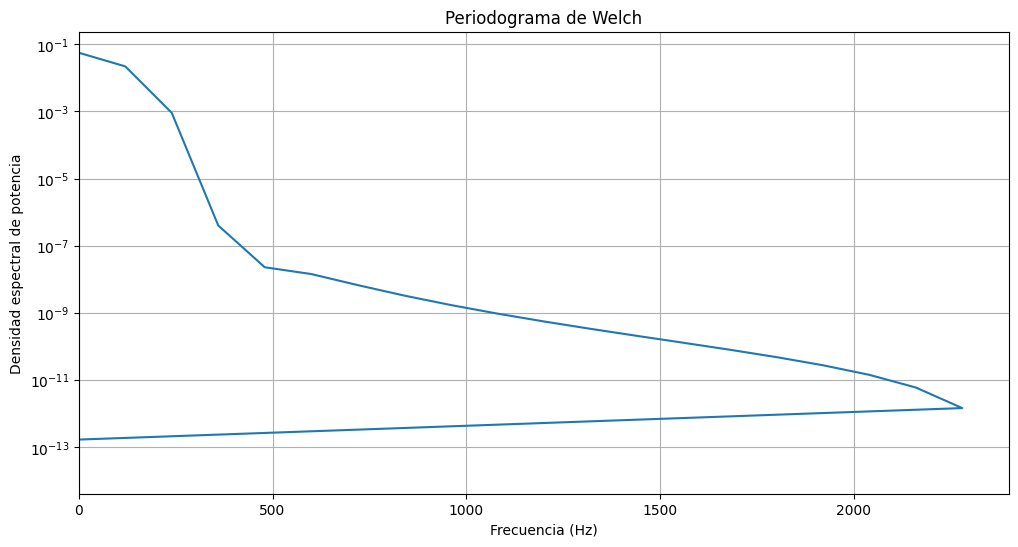

In [45]:
periodograma_welch(x_10segundos, M=40, S=15, window=np.blackman(M),Fs=Fs)